<a href="https://colab.research.google.com/github/Bhagyasri101/FMML-ASSIGNMENTS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

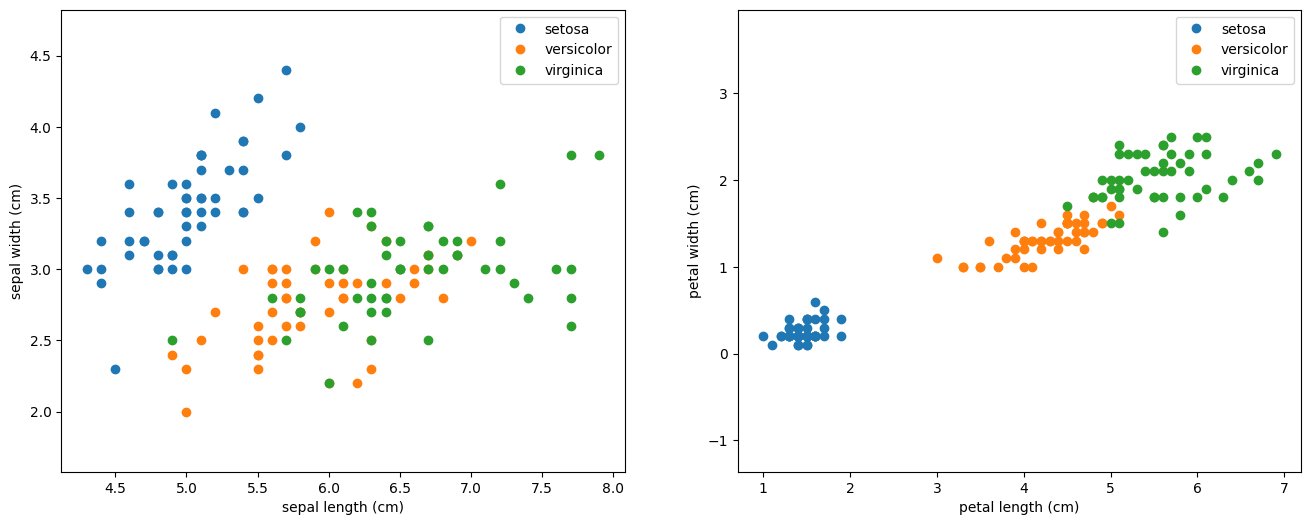

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 231.54it/s]


# Plot training progress

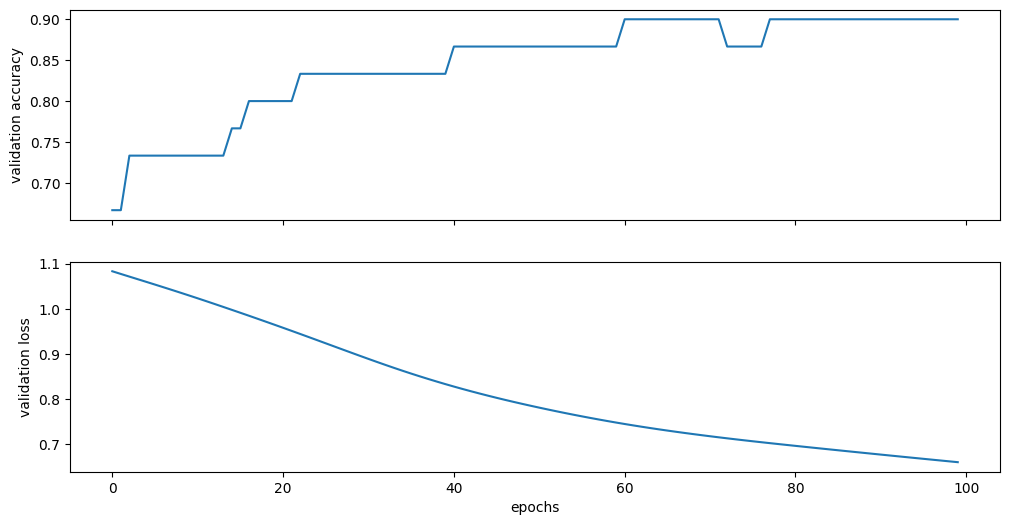

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.

ANSWER:

Fewer Hidden Layers:
Pros:
Simpler model, less prone to overfitting, faster training.
Cons:
May struggle to learn complex patterns, might not capture intricate relationships in the data.
More Hidden Layers:
Pros:
Increased capacity to learn intricate patterns and relationships in the data.
Cons:
More complex model, prone to overfitting, longer training times, and potentially higher computational costs.
Optimal Number of Hidden Layers:
The optimal number of hidden layers depends on various factors such as the complexity of the problem, the amount of data available, and computational resources.
Techniques like cross-validation and grid search can be used to find the optimal architecture for a given task.
Adjusting Layer Width and Depth:
Instead of just changing the number of hidden layers, adjusting the width (number of neurons) and depth (number of layers) simultaneously can lead to better results.
Transfer Learning:
In some cases, leveraging pre-trained models or architectures can be more effective than designing a new architecture from scratch.
Regularization:
Techniques like dropout or L2 regularization can help mitigate overfitting, allowing deeper architectures to generalize better.
Computational Resources:
Deeper architectures require more computational resources for training and inference. Thus, the choice of architecture also depends on the available resources.
Overall, changing the number of hidden layers is just one aspect of designing a neural network architecture. It's essential to consider other factors such as activation functions, optimization algorithms, regularization techniques, and data preprocessing to build an effective model for a specific task.

2.   Try changing the number of neurons in the hidden layer.

ANSWER:

Fewer Neurons:
Pros:
Reduced model complexity, less prone to overfitting, faster training.
Cons:
Might struggle to capture complex patterns in the data, limited capacity for learning intricate relationships.
More Neurons:
Pros:
Increased capacity to learn complex patterns and relationships in the data.
Cons:
Higher model complexity, potential for overfitting if not regularized properly, longer training times.
Optimal Number of Neurons:
Determining the optimal number of neurons in a hidden layer is often an empirical process.
Techniques like cross-validation or experimentation can help identify the right balance between model capacity and generalization.
Impact on Computational Resources:
Increasing the number of neurons in a hidden layer generally increases computational requirements, both for training and inference.
Larger models with more neurons might require more memory and processing power.
Regularization:
When increasing the number of neurons, it's essential to employ regularization techniques like dropout or L2 regularization to prevent overfitting.
Layer Width vs. Depth:
Sometimes, increasing the number of neurons in a layer can achieve similar effects to adding more layers, and vice versa. Balancing width and depth is crucial for optimizing network performance.
Task Complexity and Dataset Size:
The choice of the number of neurons should also consider the complexity of the task and the size of the dataset. More complex tasks or larger datasets might require more neurons for effective learning.
Experimentation and iterative refinement are often necessary to determine the optimal architecture for a specific task and dataset. It's also essential to monitor the performance of the model on validation data to ensure that adjustments to the architecture are improving generalization rather than just fitting the training data more closely.


3.   Try using a different activation function.

ANSWER:

Changing the activation function in a neural network can significantly affect its learning behavior and performance. Here are a few commonly used activation functions and how they impact the network:

ReLU (Rectified Linear Unit):
Pros:
Simple and computationally efficient.
Helps mitigate the vanishing gradient problem.
Often leads to faster convergence during training.
Cons:
Prone to "dying ReLU" problem where some neurons always output zero.
Sigmoid:
Pros:
Outputs values between 0 and 1, making it suitable for binary classification tasks.
Smooth gradient across the entire range, aiding in gradient-based optimization.
Cons:
Susceptible to vanishing gradient problem, especially for deep networks.
Not zero-centered, which might lead to slower convergence.
Tanh (Hyperbolic Tangent):
Pros:
Outputs values between -1 and 1, allowing better convergence characteristics than sigmoid.
Zero-centered, which helps in optimization.
Cons:
Still prone to vanishing gradient problem, especially in deep networks.
Computationally more expensive compared to ReLU.
Leaky ReLU:
Pros:
Addresses the "dying ReLU" problem by allowing a small gradient for negative input values.
Maintains the advantages of ReLU.
Cons:
Introduces a hyperparameter (slope of the negative part) that needs to be tuned.
ELU (Exponential Linear Unit):
Pros:
Similar to Leaky ReLU but with smoother gradients and better performance.
Handles negative values gracefully.
Cons:
More computationally expensive compared to ReLU.
Swish:
Pros:
Recently proposed activation function that tends to outperform ReLU in some cases.
Smooth gradient, potentially aiding in optimization.
Cons:
Computationally more expensive than ReLU.
Softmax (for output layer in classification tasks):
Pros:
Scales the outputs to represent probabilities, useful for multi-class classification.
Ensures that the sum of outputs across classes is equal to 1.
Cons:
Sensitivity to large input values, leading to potential numerical instability.
Choosing the right activation function depends on the nature of the problem, the architecture of the network, and empirical experimentation. It's often a good practice to start with ReLU and then experiment with other activation functions based on the specific characteristics of the task and the data.


Can you observe any changes?